# Imports

In [1]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1

Obtain the 200 top-ranking universities in www.topuniversities.com (ranking 2018). In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total). Some information is not available in the main list and you have to find them in the details page. Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

## Solution

### Explanation and assumptions

**Explanation**

For this task, we have to retrieve the information in 2 separate steps.

The first step is to retrieve the data (name of university, rank, country and region) using a simple GET query on a file. We used the Postman extension with the interceptor in order to find this file. The file contains a list of the 1000 best ranked universities sorted by rank. This file contains data in the JSON format.

The second step is to retrieve the number of faculty members and the number of students (international and total) for each university by following the details page found in the JSON data. When reaching the details page, we can simply parse the HTML and retrieve the needed information.

**Assumptions**

Some universities do not have statistics for the number of students and the number of faculty members so we store NaN for those features.

We also store the score of the university even if not asked in order to use it in the next steps

### Data retrieving

In [2]:
# Constants

TOP_UNIVERSITIES_BASE = 'https://www.topuniversities.com'
TOP_UNIVERSITIES_RANKING = TOP_UNIVERSITIES_BASE + '/sites/default/files/qs-rankings-data/357051.txt'
column_names = ['name', 'rank_top', 'country', 'region', 'score']

# mapping between div class names in the HTML and the column name in the dataframe
names_map = {
    'total faculty': 'faculty_tot',
    'inter faculty': 'faculty_int',
    'total student': 'student_tot', 
    'total inter': 'student_int'
}

In [3]:
ranking = requests.get(TOP_UNIVERSITIES_RANKING)
top_200 = ranking.json()['data'][:200]

In [4]:
# Creates an empty dataframe with the desired columns
universities_top = pd.DataFrame(columns = (column_names + list(names_map.values())))

# Utilitary function to get the statistics information needed in the details page
def get_details_info(div_name):
    div = soup.find('div', class_=div_name)
    if div:
        return int(div
            .find('div', class_='number')
            .text
            .replace("\n", "")
            .replace(",", "")
            .strip())
    else:
        return float('NaN')

for university in top_200:
    row = {
        'name': university['title'],
        'rank_top': university['rank_display'],
        'country': university['country'],
        'region': university['region'],
        'score': university['score']
    }
    
    # For each university, we visit its detail page and retrieve the remanining statistics
    details_page_url = TOP_UNIVERSITIES_BASE + university['url']
    r = requests.get(details_page_url)
    soup = BeautifulSoup(r.text,'html.parser')
    
    for div_class, column_name in names_map.items():
        row[column_name] = get_details_info(div_class)
    
universities_top.set_index(['name'])

,rank_top,country,region,score,faculty_tot,faculty_int,student_tot,student_int
name,,,,,,,,
Massachusetts Institute of Technology (MIT),1,United States,North America,100,2982,1679,11067,3717
Stanford University,2,United States,North America,98.7,4285,2042,15878,3611
Harvard University,3,United States,North America,98.4,4350,1311,22429,5266
California Institute of Technology (Caltech),4,United States,North America,97.7,953,350,2255,647
University of Cambridge,5,United Kingdom,Europe,95.6,5490,2278,18770,6699
University of Oxford,6,United Kingdom,Europe,95.3,6750,2964,19720,7353
UCL (University College London),7,United Kingdom,Europe,94.6,6345,2554,31080,14854
Imperial College London,8,United Kingdom,Europe,93.7,3930,2071,16090,8746
University of Chicago,9,United States,North America,93.5,2449,635,13557,3379


In [5]:
universities_top

,name,rank_top,country,region,score,faculty_tot,faculty_int,student_tot,student_int
0,Massachusetts Institute of Technology (MIT),1,United States,North America,100,2982,1679,11067,3717
1,Stanford University,2,United States,North America,98.7,4285,2042,15878,3611
2,Harvard University,3,United States,North America,98.4,4350,1311,22429,5266
3,California Institute of Technology (Caltech),4,United States,North America,97.7,953,350,2255,647
4,University of Cambridge,5,United Kingdom,Europe,95.6,5490,2278,18770,6699
5,University of Oxford,6,United Kingdom,Europe,95.3,6750,2964,19720,7353
6,UCL (University College London),7,United Kingdom,Europe,94.6,6345,2554,31080,14854
7,Imperial College London,8,United Kingdom,Europe,93.7,3930,2071,16090,8746
8,University of Chicago,9,United States,North America,93.5,2449,635,13557,3379
9,ETH Zurich - Swiss Federal Institute of Techno...,10,Switzerland,Europe,93.3,2477,1886,19815,7563


### 1) Which are the best universities in term of

We first define a little utilitary function to plot bar plots

In [6]:
def custom_bar_plot(x, y, data, title):
    fig, ax = plt.subplots()
    ax.set_title(title, fontsize=15, fontweight='bold')
    sns.barplot(x=x, y=y, data=data)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)

**(a) ratio between faculty members and students**

Here we just need to compute the ratio into a new column and sort by that column. We also drop the columns with NaN's because it means that we don't have that information

**Plotting this informatio in bar plots does not make sense as there are too many universities**

In [7]:
def ratio_faculty_students(df, columns):
    df['ratio_faculty_students'] = df['faculty_tot'] / df['student_tot']
    return df[columns].dropna()

ratio_faculty_students(universities_top, ['name', 'ratio_faculty_students']).sort_values('ratio_faculty_students', ascending=False).set_index('name')

,ratio_faculty_students
name,
California Institute of Technology (Caltech),0.422616
Yale University,0.398323
University of Oxford,0.342292
University of Cambridge,0.292488
Johns Hopkins University,0.276353
Stanford University,0.26987
Massachusetts Institute of Technology (MIT),0.26945
University of Rochester,0.266604
University of Pennsylvania,0.266437


**(b) ratio of international students?**

In [8]:
def ratio_int(df, columns):
    df['ratio_int_students'] = df['student_int'] / df['student_tot']
    return df[columns].dropna()

ratio_int(universities_top, ['name', 'ratio_int_students']).sort_values('ratio_int_students', ascending=False).set_index('name')

,ratio_int_students
name,
London School of Economics and Political Science (LSE),0.691393
Ecole Polytechnique Fédérale de Lausanne (EPFL),0.570047
Imperial College London,0.543567
Maastricht University,0.502533
Carnegie Mellon University,0.478062
UCL (University College London),0.477928
University of St Andrews,0.457955
The University of Melbourne,0.427434
Queen Mary University of London,0.421816


### Answer the previous question aggregating the data by

**c) country**

Ratio of faculty members and students

In [9]:
universities_grouped_country = universities_top[['country', 'faculty_tot', 'student_tot', 'student_int']].groupby(['country'], as_index=False).sum()

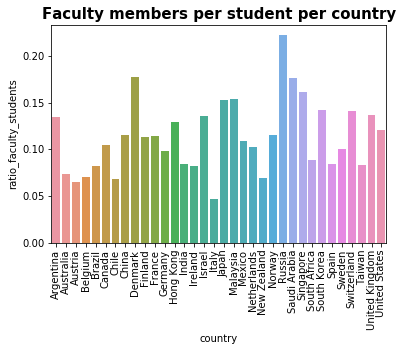

In [10]:
data = ratio_faculty_students(universities_grouped_country, ['country', 'ratio_faculty_students'])
custom_bar_plot('country', 'ratio_faculty_students', data, 'Faculty members per student per country')

Ratio of international students

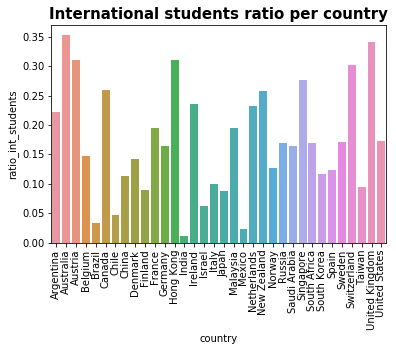

In [11]:
data = ratio_int(universities_grouped_country, ['country', 'ratio_int_students'])
custom_bar_plot('country', 'ratio_int_students', data, 'International students ratio per country')

**d) region**

Ratio of faculty members and students

In [12]:
universities_grouped_region = universities_top[['region', 'faculty_tot', 'student_tot', 'student_int']].groupby(['region'], as_index=False).sum()

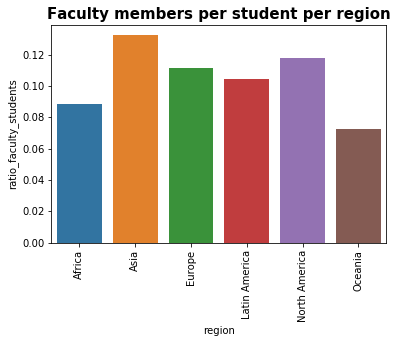

In [13]:
data = ratio_faculty_students(universities_grouped_region, ['region', 'ratio_faculty_students'])
custom_bar_plot('region', 'ratio_faculty_students', data, 'Faculty members per student per region')

Ratio of international students

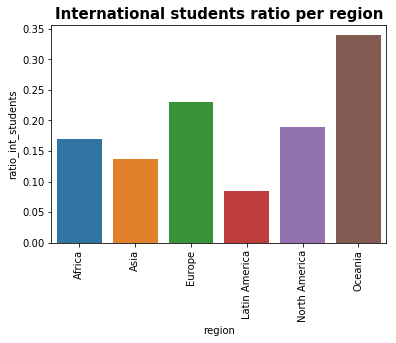

In [16]:
data = ratio_int(universities_grouped_region, ['region', 'ratio_int_students'])
custom_bar_plot('region', 'ratio_int_students', data, 'International students ratio per region')

## Task 2

Obtain the 200 top-ranking universities in www.timeshighereducation.com (ranking 2018). Repeat the analysis of the previous point and discuss briefly what you observed.

## Solution

### Explanation and assumptions

**Explanation**

For this task, we can retrieve the information in one step.

We retrieve the data using a simple GET query on a file. We used the Postman extension with the interceptor in order to find the URL of this file. The file contains the list of the universities sorted by rank. This file contains data in the JSON format.

From it we parse the name of university, rank, country, score, total faculty members, total number of student and percentage of international student. 

We use the first dataframe to fetch the region of a university and if no region can be found we will use the country as its own region. We do this because statistics could be biaised if some countries are group together under the same 'unkown' region.

We assume that the faculty members are the people who work for the students. So we retrieve the ratio of student per staff members and compute the total faculty members using this ratio and the total number of students. 

The number of international students is computed using the percentage retrieved on the website and the total number of students. 

We also ceil any value that we found since it is meaningless to have a non integer number of people.

## Code

In [25]:
# Constants
PERCENT_FORMAT = "%.1f%%"
TIMES_BASE = 'https://www.timeshighereducation.com'
TIMES_RANKING = TIMES_BASE + '/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
column_names = ['name', 'rank_times', 'country', 'region', 'score']
names_map = {
    'total faculty':'faculty_tot',
    'total student':'student_tot', 
    'total inter':'student_int'
}

In [26]:
ranking = requests.get(TIMES_RANKING)
top_200 = ranking.json()['data'][:200]

In [47]:
universities_times = pd.DataFrame(columns = (column_names + list(names_map.values())))

# Retrieve the regions of a country from the first Dataframe
def get_region(country):
    # Get rows where country is the same and filter to have only the region
    res = universities_top[universities_top['country']==country]['region']
    
    # Check that there is a result
    if len(res):
        region = res.iloc[0]
        return region
    else:
        return country

def to_int(value):
    return int(value.replace(",","").replace('%',""))

for university in top_200:
    row = {
        'name': university['name'],
        'rank_times': university['rank'],
        'country': university['location'],
        'region' : get_region(university['location'].strip()),
        'score': university['scores_overall'],
        'faculty_tot': np.ceil(to_int(university['stats_number_students']) / float(university['stats_student_staff_ratio'])),   
        'student_tot': to_int(university['stats_number_students']),
        'student_int': np.ceil(to_int(university['stats_number_students']) * (to_int(university['stats_pc_intl_students']) / 100)),   
    }
        
    universities_times = universities_times.append(row, ignore_index=True)

universities_times = universities_times.set_index(['name'])

In [48]:
universities_times

,rank_times,country,region,score,faculty_tot,student_tot,student_int
name,,,,,,,
University of Oxford,1,United Kingdom,Europe,94.3,1823.0,20409,7756.0
University of Cambridge,2,United Kingdom,Europe,93.2,1688.0,18389,6437.0
California Institute of Technology,=3,United States,North America,93.0,340.0,2209,597.0
Stanford University,=3,United States,North America,93.0,2113.0,15845,3486.0
Massachusetts Institute of Technology,5,United States,North America,92.5,1285.0,11177,3801.0
Harvard University,6,United States,North America,91.8,2284.0,20326,5285.0
Princeton University,7,United States,North America,91.1,959.0,7955,1910.0
Imperial College London,8,United Kingdom,Europe,89.2,1391.0,15857,8722.0
University of Chicago,9,United States,North America,88.6,2182.0,13525,3382.0


#### a) ratio between faculty members and students

##### Explanation

We simply compute the ratio of total faculty members over the total number of students with the value we retrieved


In [49]:
# Compute the ratio
universities_times['fac/stud'] = universities_times['faculty_tot'] / universities_times['student_tot']

# Convert it to float
universities_times['fac/stud'] = universities_times['fac/stud'].astype(float)

# Remove unwanted columns
fac_stud_ratio = universities_times[['fac/stud','country','region']]

# Sort on the ratio
fac_stud_ratio = fac_stud_ratio.sort_values(['fac/stud'],ascending=False)


show = fac_stud_ratio.copy()

# Show result with a meaningful string
show['fac/stud'] = show['fac/stud'].apply(lambda x : PERCENT_FORMAT % (x*100))
show

,fac/stud,country,region
name,,,
Vanderbilt University,30.3%,United States,North America
University of Copenhagen,24.4%,Denmark,Europe
Johns Hopkins University,23.3%,United States,North America
Yale University,23.3%,United States,North America
University of Rochester,23.3%,United States,North America
Emory University,22.7%,United States,North America
Duke University,22.2%,United States,North America
École Polytechnique,19.6%,France,Europe
Scuola Normale Superiore di Pisa,19.4%,Italy,Europe


##### Results

This higher the ration the better students can be served since there is people to handle their requests. 

#### b) ratio of international students

##### Explanation

Same here we compute the ratio of international student over the total number of student with the value we retrieved

In [50]:
# Compute ratio
universities_times['int/stud'] = universities_times['student_int'] / universities_times['student_tot']

# Convert it to float
universities_times['int/stud'] = universities_times['int/stud'].astype(float)

# Remove unwanted columns
int_total_student = universities_times[['int/stud','country','region']]

# Sort on the ratio
int_total_student = int_total_student.sort_values(['int/stud'],ascending=False)

show = int_total_student.copy()

# Show result with a meaningful string
show['int/stud'] = show['int/stud'].apply(lambda x : PERCENT_FORMAT % (x*100))
show

,int/stud,country,region
name,,,
London School of Economics and Political Science,71.0%,United Kingdom,Europe
University of Luxembourg,57.0%,Luxembourg,Luxembourg
École Polytechnique Fédérale de Lausanne,55.0%,Switzerland,Europe
Imperial College London,55.0%,United Kingdom,Europe
Maastricht University,50.0%,Netherlands,Europe
University College London,49.0%,United Kingdom,Europe
University of St Andrews,48.0%,United Kingdom,Europe
Carnegie Mellon University,45.0%,United States,North America
Queen Mary University of London,45.0%,United Kingdom,Europe


##### Results

The universities with the largest ratio of international student are the one located in Capitals and large cities

#### c)  
##### Explanation

We will use the mean value to aggregate by country

##### 1) ratio between faculty members and students aggregated by country

In [51]:
# Aggregate attr of a Dataframe on factor using mean as aggregate operator
def aggregate(show,attr, factor):
    # Convert attr to float
    show[attr] = show[attr].astype(float)
    
    # Group by factor and take the mean
    show = show.groupby([factor]).mean()
    
    # Sort on attr
    show = show.sort_values([attr],ascending=False)
    
    # apply some nice formating (xx.x%)
    show[attr] = show[attr].apply(lambda x : PERCENT_FORMAT % (x*100))
    
    # Return a Dataframe sorted on Descending attr
    return show

In [52]:
show = aggregate(fac_stud_ratio.copy(),'fac/stud','country')
show

,fac/stud
country,
Denmark,16.0%
Italy,14.0%
Russian Federation,13.7%
Japan,13.2%
United States,10.6%
France,9.9%
China,8.7%
Taiwan,8.7%
South Africa,8.5%


##### Results

When aggrating by country the results show that the first ones are not necessarily the ones with the best ranking on the site

##### 2) ratio of international students aggregated by country

In [53]:
show = int_total_student.copy()
show = aggregate(int_total_student.copy(),'int/stud','country')
show

,int/stud
country,
Luxembourg,57.0%
United Kingdom,36.6%
Hong Kong,32.8%
Switzerland,31.4%
Australia,30.8%
Singapore,30.5%
New Zealand,29.0%
Ireland,27.0%
Austria,26.0%


##### Results

Even if the United States is a large and leading country, US universities are devanced by smaller countries like Luxembourg, Hong Kong or Singapore

#### d) 
##### Explanation

We will use the mean value to aggregate by region

##### 1) ratio between faculty members and students aggregated by region

In [54]:
show = aggregate(fac_stud_ratio.copy(),'fac/stud','region')
show

,fac/stud
region,
Russian Federation,13.7%
North America,10.2%
Africa,8.5%
Asia,8.0%
Luxembourg,6.9%
Europe,6.5%
Oceania,4.0%


##### Results

First we notice that Russia has been separated from Europe and Asia to form its own region. This isn't a problem since the whole country spread from Europe to Asia.

##### 2) ratio of international students aggregated by region##### Results

In [56]:
show = int_total_student.copy()
show = int_total_student.copy()
show = aggregate(int_total_student.copy(),'int/stud','region')
show

,int/stud
region,
Luxembourg,57.0%
Oceania,30.6%
Europe,24.2%
Russian Federation,22.0%
North America,18.6%
Africa,18.0%
Asia,16.5%


In [ ]:
##### Results

